In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('C:/Works/Personal/repo/PYTORCH_NOTEBOOKS/Data/NYCTaxiFares.csv')

In [6]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [7]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [8]:
#The haversine formula calculates the distance on a sphere between two sets of GPS coordinates.
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [9]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [10]:
df['disk_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude','dropoff_latitude','dropoff_longitude')

In [11]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,disk_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null datetime64[ns, UTC]
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
disk_km              120000 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [14]:
df['pickup_datetime']

0        2010-04-19 08:17:56+00:00
1        2010-04-17 15:43:53+00:00
2        2010-04-17 11:23:26+00:00
3        2010-04-11 21:25:03+00:00
4        2010-04-17 02:19:01+00:00
5        2010-04-22 08:39:47+00:00
6        2010-04-23 19:27:00+00:00
7        2010-04-15 09:03:37+00:00
8        2010-04-20 08:58:00+00:00
9        2010-04-16 18:50:16+00:00
10       2010-04-22 22:26:23+00:00
11       2010-04-15 17:40:18+00:00
12       2010-04-23 12:12:08+00:00
13       2010-04-18 02:35:26+00:00
14       2010-04-21 10:12:59+00:00
15       2010-04-20 23:31:17+00:00
16       2010-04-15 21:54:26+00:00
17       2010-04-15 08:55:51+00:00
18       2010-04-14 23:12:52+00:00
19       2010-04-14 01:22:00+00:00
20       2010-04-20 11:27:29+00:00
21       2010-04-12 09:37:56+00:00
22       2010-04-13 13:55:05+00:00
23       2010-04-20 16:33:00+00:00
24       2010-04-21 14:03:52+00:00
25       2010-04-24 09:16:19+00:00
26       2010-04-11 21:38:28+00:00
27       2010-04-22 23:36:50+00:00
28       2010-04-23 

In [17]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [18]:
df['Hour'] = df['EDTdate'].dt.hour
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [20]:
df['Weekday']

0         Mon
1         Sat
2         Sat
3         Sun
4         Fri
5         Thu
6         Fri
7         Thu
8         Tue
9         Fri
10        Thu
11        Thu
12        Fri
13        Sat
14        Wed
15        Tue
16        Thu
17        Thu
18        Wed
19        Tue
20        Tue
21        Mon
22        Tue
23        Tue
24        Wed
25        Sat
26        Sun
27        Thu
28        Fri
29        Tue
         ... 
119970    Sun
119971    Thu
119972    Fri
119973    Sat
119974    Sat
119975    Tue
119976    Tue
119977    Tue
119978    Sun
119979    Wed
119980    Wed
119981    Thu
119982    Wed
119983    Wed
119984    Fri
119985    Mon
119986    Fri
119987    Mon
119988    Sun
119989    Sat
119990    Sun
119991    Mon
119992    Fri
119993    Mon
119994    Sun
119995    Sun
119996    Fri
119997    Sun
119998    Tue
119999    Sat
Name: Weekday, Length: 120000, dtype: object

In [22]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'disk_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [23]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'disk_km']

In [24]:
y_col = ['fare_amount'] #for regression problem

In [27]:
for category in cat_cols:
    df[category] = df[category].astype('category')

In [29]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
disk_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [30]:
df['Hour'].head() #recognizes the column as a categorical data

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [32]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [33]:
df['Weekday'].cat.codes

0         1
1         2
2         2
3         3
4         0
5         4
6         0
7         4
8         5
9         0
10        4
11        4
12        0
13        2
14        6
15        5
16        4
17        4
18        6
19        5
20        5
21        1
22        5
23        5
24        6
25        2
26        3
27        4
28        0
29        5
         ..
119970    3
119971    4
119972    0
119973    2
119974    2
119975    5
119976    5
119977    5
119978    3
119979    6
119980    6
119981    4
119982    6
119983    6
119984    0
119985    1
119986    0
119987    1
119988    3
119989    2
119990    3
119991    1
119992    0
119993    1
119994    3
119995    3
119996    0
119997    3
119998    5
119999    2
Length: 120000, dtype: int8

In [34]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [35]:
hr
ampm

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [36]:
cats = np.stack([hr, ampm, wkdy], axis = 1)

In [37]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [38]:
#list comprehensions
cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)

In [39]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [40]:
cats = torch.tensor(cats, dtype = torch.int64)

In [41]:
cats

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        ...,
        [14,  1,  3],
        [ 4,  0,  5],
        [12,  1,  2]])

In [42]:
# Converting the continuous variables to a tensor
conts = np.stack([df[col].values for col in cont_cols], 1)

In [43]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [45]:
conts = torch.tensor(conts, dtype = torch.float)

In [46]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [54]:
y = torch.tensor(df[y_col].values, dtype = torch.float).reshape(-1,1)

In [48]:
y_col

['fare_amount']

In [49]:
cats.shape

torch.Size([120000, 3])

In [50]:
conts.shape

torch.Size([120000, 6])

In [55]:
y.shape

torch.Size([120000, 1])

In [56]:
#how many categories we have
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [57]:
cat_szs

[24, 2, 7]

In [58]:
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]

In [59]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [65]:
catsz = cats[:4]

In [62]:
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])

In [64]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [67]:
#forward method for categorical data
embeddingz = []
for i,e in enumerate(selfembeds):
    embeddingz.append(e(catsz[:, i]))

In [68]:
embeddingz

[tensor([[ 0.4800, -1.0282,  0.9594, -0.3094,  0.1265,  0.5698,  0.7340,  1.5035,
          -0.2865,  2.2730, -0.3771,  0.5157],
         [-1.8745,  1.0936,  1.3910, -0.7170, -1.6668, -0.3662, -0.8967, -0.9875,
          -0.8058, -1.2279, -1.1466, -2.1144],
         [ 0.4918, -0.7136, -0.9177,  0.3648,  1.2444,  0.2242,  0.6252,  0.5332,
          -0.8489, -0.7988, -1.2069,  0.3252],
         [-1.5153,  0.1246, -0.8805, -0.8173,  1.3218,  2.4030, -0.2293, -0.4535,
           1.7229,  0.6190, -0.6230,  1.4588]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.0696],
         [-0.0696],
         [-0.0696],
         [ 0.9324]], grad_fn=<EmbeddingBackward>),
 tensor([[-0.2061,  0.6124,  0.9810,  0.2384],
         [ 1.1129, -0.3038,  0.5105,  0.3848],
         [ 1.1129, -0.3038,  0.5105,  0.3848],
         [ 0.5790,  1.0053,  0.3768, -0.2838]], grad_fn=<EmbeddingBackward>)]

In [69]:
z = torch.cat(embeddingz, 1)

In [70]:
z

tensor([[ 0.4800, -1.0282,  0.9594, -0.3094,  0.1265,  0.5698,  0.7340,  1.5035,
         -0.2865,  2.2730, -0.3771,  0.5157, -0.0696, -0.2061,  0.6124,  0.9810,
          0.2384],
        [-1.8745,  1.0936,  1.3910, -0.7170, -1.6668, -0.3662, -0.8967, -0.9875,
         -0.8058, -1.2279, -1.1466, -2.1144, -0.0696,  1.1129, -0.3038,  0.5105,
          0.3848],
        [ 0.4918, -0.7136, -0.9177,  0.3648,  1.2444,  0.2242,  0.6252,  0.5332,
         -0.8489, -0.7988, -1.2069,  0.3252, -0.0696,  1.1129, -0.3038,  0.5105,
          0.3848],
        [-1.5153,  0.1246, -0.8805, -0.8173,  1.3218,  2.4030, -0.2293, -0.4535,
          1.7229,  0.6190, -0.6230,  1.4588,  0.9324,  0.5790,  1.0053,  0.3768,
         -0.2838]], grad_fn=<CatBackward>)

In [71]:
selfembdrop = nn.Dropout(.4)

In [72]:
z = selfembdrop(z)

In [73]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [76]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1],1,[200,100], p=.4)

In [77]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [78]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = .001)

In [79]:
batch_size = 60000
test_size = int(batch_size*.2)

In [80]:
cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [81]:
len(cat_train)

48000

In [83]:
len(con_train)

48000

In [84]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) # RMSE
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 12.50055885
epoch:  11  loss: 12.16098499
epoch:  21  loss: 11.73817062
epoch:  31  loss: 11.32352638
epoch:  41  loss: 10.90359497
epoch:  51  loss: 10.48028374
epoch:  61  loss: 10.07851315
epoch:  71  loss: 9.70609474
epoch:  81  loss: 9.36692047
epoch:  91  loss: 9.05598068
epoch: 101  loss: 8.73125935
epoch: 111  loss: 8.39310837
epoch: 121  loss: 8.01679897
epoch: 131  loss: 7.60949278
epoch: 141  loss: 7.18718481
epoch: 151  loss: 6.71823120
epoch: 161  loss: 6.23946238
epoch: 171  loss: 5.74438238
epoch: 181  loss: 5.25834036
epoch: 191  loss: 4.80099249
epoch: 201  loss: 4.36134100
epoch: 211  loss: 4.01410532
epoch: 221  loss: 3.76123047
epoch: 231  loss: 3.61943889
epoch: 241  loss: 3.52388430
epoch: 251  loss: 3.49277592
epoch: 261  loss: 3.44487143
epoch: 271  loss: 3.42541933
epoch: 281  loss: 3.41839337
epoch: 291  loss: 3.38070989
epoch: 300  loss: 3.39648104

Duration: 1385 seconds


Text(0.5, 0, 'epoch')

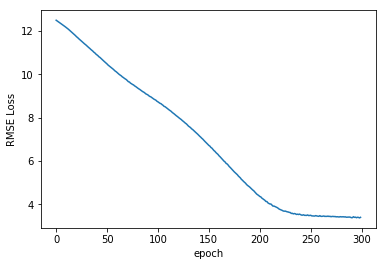

In [85]:
plt.plot(range(epochs), losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')

In [86]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 3.32244420


In [87]:
print(f'{"PREDICTED":>12} {"ACTUAL":>8} {"DIFF":>8}')
for i in range(50):
    diff = np.abs(y_val[i].item()-y_test[i].item())
    print(f'{i+1:2}. {y_val[i].item():8.4f} {y_test[i].item():8.4f} {diff:8.4f}')

   PREDICTED   ACTUAL     DIFF
 1.   3.6604   2.9000   0.7604
 2.  25.5793   5.7000  19.8793
 3.   6.3740   7.7000   1.3260
 4.  13.3717  12.5000   0.8717
 5.   4.7261   4.1000   0.6261
 6.   5.3536   5.3000   0.0536
 7.   4.2139   3.7000   0.5139
 8.  17.7044  14.5000   3.2044
 9.   7.2607   5.7000   1.5607
10.  11.4200  10.1000   1.3200
11.   5.7748   4.5000   1.2748
12.   6.0273   6.1000   0.0727
13.   5.7038   6.9000   1.1962
14.  12.5967  14.1000   1.5033
15.   6.0227   4.5000   1.5227
16.  29.4009  34.1000   4.6991
17.   2.9327  12.5000   9.5673
18.   5.0789   4.1000   0.9789
19.   7.9560   8.5000   0.5440
20.   5.8141   5.3000   0.5141
21.  15.0422  11.3000   3.7422
22.   9.0033  10.5000   1.4967
23.  15.3959  15.3000   0.0959
24.  19.2365  14.9000   4.3365
25.  46.0499  49.5700   3.5201
26.   6.0157   5.3000   0.7157
27.   5.5230   3.7000   1.8230
28.   8.0843   6.5000   1.5843
29.  14.3724  14.1000   0.2724
30.   6.8478   4.9000   1.9478
31.   5.9659   3.7000   2.2659
32.  34.

In [88]:
# Make sure to save the model only after the training has happened!
if len(losses) == epochs:
    torch.save(model.state_dict(), 'TaxiFareRegrModel.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')